In [5]:
import os 
from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

# change dir to project dir
if 'changed' not in globals():
    os.chdir('../../../..')
    changed = 1

In [6]:
outdir = 'results/motif_pairs/rignacio_work/summary/'
os.makedirs(outdir, exist_ok=True)

In [7]:
# output directory for simulations
mp_data_dir = 'results/motif_pairs/rignacio_work/Motif_Pairs_100000_only_chr/a_plus/'
glob_path = mp_data_dir + '{SAMPLE_NAME}/Q_values_sig.top_50_count.tsv'
fns = glob(glob_path.format(SAMPLE_NAME='*'))

In [8]:
len(fns)

30

In [9]:
# load the data
data = []
samples = []
for fn in fns:

    sample_name = fn.split('/')[-2]
    samples.append(sample_name)
    tdf = pd.read_table(fn)
    print(tdf.shape)
    tdf['sample_name'] = sample_name
    data.append(tdf)

all_df = pd.concat(data)
print(all_df.shape)
all_df = all_df.loc[all_df['Q_value'] < 0.05]
#all_df = all_df.loc[all_df['Q_value'] < 0.01]
print(all_df.shape)

(1431, 10)
(1275, 10)
(1485, 10)
(1431, 10)
(1485, 10)
(1275, 10)
(1378, 10)
(1275, 10)
(1275, 10)
(1275, 10)
(1275, 10)
(1275, 10)
(1378, 10)
(1275, 10)
(1378, 10)
(1275, 10)
(1378, 10)
(1378, 10)
(1485, 10)
(1378, 10)
(1275, 10)
(1378, 10)
(1275, 10)
(1275, 10)
(1485, 10)
(1378, 10)
(1275, 10)
(1275, 10)
(1378, 10)
(1275, 10)
(40329, 11)
(1660, 11)


In [10]:
# sort the pairs before working with them
def sort_pairs(sr):
    pairs_list = [sr.Motif1.strip(), sr.Motif2.strip()]
    return(sorted(pairs_list))
anchor_sorted_1, anchor_sorted_2 = zip(*all_df.apply(sort_pairs, axis=1))
all_df.loc[:, 'anchor_sorted_1'] = anchor_sorted_1
all_df.loc[:, 'anchor_sorted_2'] = anchor_sorted_2
all_df.loc[:, 'pair_sorted'] = all_df.loc[:, 'anchor_sorted_1'] + ',' + all_df.loc[:, 'anchor_sorted_2']

In [11]:
def get_log10(x, replace_inf=1000000):
    log_val = -np.log(x)
    if log_val < np.inf:
        return(log_val)
    else:
        return(replace_inf)
    
# set replace_inf = 12 because 
# all_df.loc[~np.isinf(all_df['-log_qvalue'])]['-log_qvalue'].max() == 11
all_df.loc[:, '-log_qvalue'] = all_df.Q_value.apply(get_log10, args=[12])
#all_df.loc[:, '-log_qvalue'] = all_df.Q_value.apply(lambda x: -np.log(x))

/tmp/ipykernel_116316/134741291.py:2: RuntimeWarning: divide by zero encountered in log
  log_val = -np.log(x)


### Summary of Motif Pairs

In [12]:
mp_grps = all_df.groupby(['pair_sorted']) 
mp_counts_ss = mp_grps.count()['Sim_Count'].to_frame()
mp_counts_ss.sort_values(['Sim_Count'], ascending=[True], inplace=True)

In [13]:
mp_counts_ss

,Sim_Count
pair_sorted,
"KLF6,ZNF320",1
"EWSR1-FLI1,TFAP2A",1
"EWSR1-FLI1,TFAP2C",1
"EWSR1-FLI1,ZNF454",1
"EWSR1-FLI1,ZNF460",1
...,...
"CTCF,ZNF320",19
"THAP1,ZNF320",20
"THAP11,THAP11",20


<Axes: xlabel='Sim_Count', ylabel='Count'>

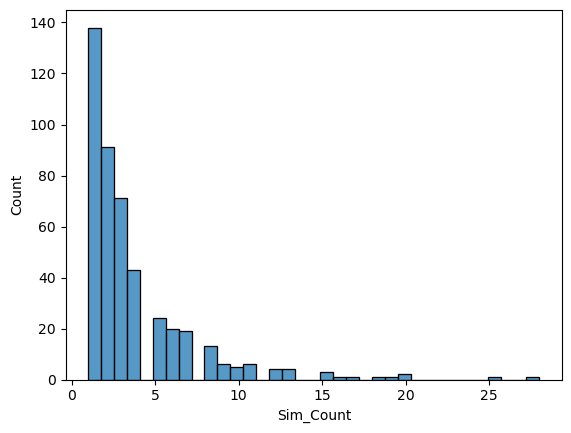

In [14]:
sns.histplot(mp_counts_ss.Sim_Count)

### Summary of 1D Motif

In [15]:
left_df = all_df.drop(['anchor_sorted_2'], axis=1).rename(columns={'anchor_sorted_1': 'Motif'})
right_df = all_df.drop(['anchor_sorted_1'], axis=1).rename(columns={'anchor_sorted_2': 'Motif'})
oned_motif_df = pd.concat([left_df, right_df])

In [16]:
oned_motif_df.head()

,Unnamed: 0,Pair,Sim_Count,P_value,Obs_Count,Motif1,Motif2,Contain_1,Contain_2,Q_value,sample_name,Motif,pair_sorted,-log_qvalue
40,2632,"('ASCL1', 'ZNF320')",6,0.00006,263,ZNF320,ASCL1,True,True,0.014310,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens....,ASCL1,"ASCL1,ZNF320",4.246797
106,6834,"('EHF', 'KLF6')",22,0.00022,120,KLF6,EHF,True,True,0.024217,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens....,EHF,"EHF,KLF6",3.720704
113,7164,"('KLF4', 'PLAG1')",32,0.00032,333,PLAG1,KLF4,True,True,0.030528,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens....,KLF4,"KLF4,PLAG1",3.489111
172,11111,"('THRA', 'ZNF460')",12,0.00012,1273,ZNF460,THRA,True,True,0.017172,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens....,THRA,"THRA,ZNF460",4.064475
175,11271,"('ZNF460', 'ZNF460')",1,0.00001,3202,ZNF460,ZNF460,True,True,0.004770,Monocyte_1800-RH-1.phs001703v3p1.Homo_Sapiens....,ZNF460,"ZNF460,ZNF460",5.345409


In [17]:
motif_grps = oned_motif_df.groupby(['Motif']) 
motif_counts_ss = motif_grps.count()['Sim_Count'].to_frame()
motif_counts_ss.sort_values(['Sim_Count'], ascending=[True], inplace=True)

In [18]:
motif_counts_ss

,Sim_Count
Motif,
ZNF93,1
SPIB,1
EHF,1
ZNF610,2
E2F6,2
IRF1,2
SREBF1,4
SPI1,5
ZNF24,7


#### Making a jointplot of the motif-pair frequencies for different sample sets 

In [19]:
def get_motifs(x):
    s = x.replace("'", '').replace('(', '').replace(')', '').strip()
    motifs = sorted(s.split(','))
    return(motifs)

In [20]:
# extract the counts for the current set
a_plus_counts = mp_counts_ss

# take the top n only
topn = 25
#topn = 1000
a_plus_counts = a_plus_counts.sort_values('Sim_Count', ascending=False).iloc[0:topn]
a_plus_counts.sort_index(inplace=True)

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: get_motifs(x), a_plus_counts.index)))

a_plus_counts['anchor_sorted_1'] = left_anchors
a_plus_counts['anchor_sorted_2'] = right_anchors
a_plus_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_2'], ascending=[False, False], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
a_plus_counts_rev = a_plus_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
a_plus_counts = pd.concat([a_plus_counts, a_plus_counts_rev])

# pivot the data into matrix for and fillna
a_plus_counts_matrix = a_plus_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='Sim_Count', fill_value=0)
#a_plus_counts_matrix.fillna(0, inplace=True)

# # reverse the index values 
# rev_index = list(reversed(sorted(a_plus_counts_matrix.index)))
# a_plus_counts_matrix = a_plus_counts_matrix.loc[rev_index]

a_plus_counts_matrix.shape

(20, 20)

In [21]:
a_plus_counts_matrix.sort_index(ascending=False, inplace=True)

In [22]:
# calculate frequencies for the column panel
col_idxs = a_plus_counts_matrix.columns.tolist()
col_oned_motif_counts = motif_counts_ss.loc[col_idxs].reset_index()

# calculate frequencies for the row panel
row_idxs = a_plus_counts_matrix.index.tolist()
row_oned_motif_counts = a_plus_counts_matrix.sum().loc[row_idxs].to_frame().reset_index()
row_oned_motif_counts.columns = ['Motif', 'topn_freq']

# calculating the number 
num_a_samples = all_df.drop_duplicates(['sample_name']).shape[0]

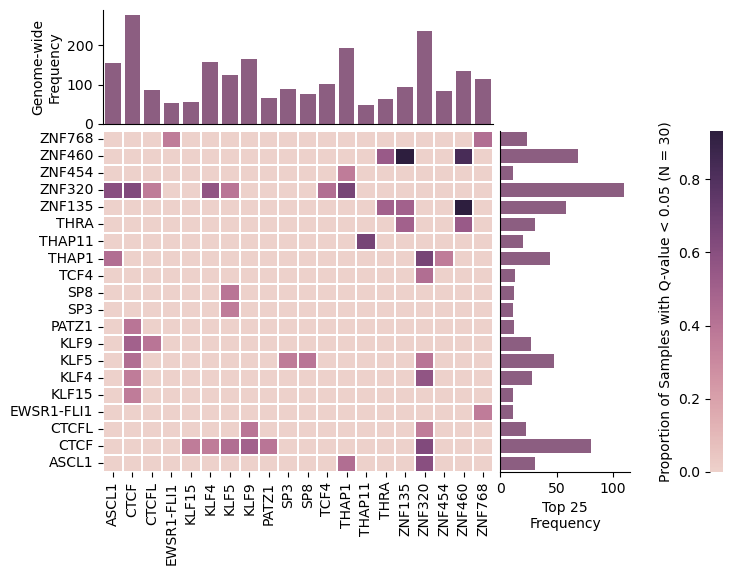

In [23]:
fig = plt.figure(figsize=(8, 6))
#fig = plt.figure(figsize=(16, 12))
#fig = plt.figure(figsize=(32, 24))

hspace = 0.03
wspace = 0.05

purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# making the gridspec and separating each piece
grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

top_panel = fig.add_subplot(grid[0, 0])
large_box = fig.add_subplot(grid[1, 0])

right_panel = fig.add_subplot(grid[1, 1])
legend_panel = fig.add_subplot(grid[1, 3])

# drawing a heatmap in the large box
#sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
sns.heatmap(a_plus_counts_matrix / num_a_samples, robust=False, ax=large_box, 
            xticklabels=True, yticklabels=True,
            cbar=True, cbar_ax=legend_panel, 
            cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
            cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
large_box.set(xlabel='', ylabel='')

# drawing a barplot of 1D motif frequencies across the whole genome
sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
sns.despine(ax=top_panel, right=True, top=True)

# drawing a barplot of 1D motif frequencies across the top 25 motif pairs
sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
sns.despine(ax=right_panel, right=True, top=True)

# save the figure 
fn = os.path.join(outdir, 'motif_pair_distributions.V1.png')
fig.savefig(fn, dpi=600, bbox_inches='tight')

### Making a Max Log(Q-value Version)

In [24]:
# extract the counts for the current set
mp_maxq_ss = mp_grps.max()
maxq_counts = mp_maxq_ss

# take the top n only
topn = 1000
maxq_counts = maxq_counts.sort_values('-log_qvalue', ascending=False)#.iloc[0:topn]

# convert the index into two columns and sort 
left_anchors, right_anchors = list(zip(*map(lambda x: x.split(','), maxq_counts.index)))
maxq_counts['anchor_sorted_1'] = left_anchors
maxq_counts['anchor_sorted_2'] = right_anchors
maxq_counts.sort_values(['anchor_sorted_1', 'anchor_sorted_1'], ascending=[True, True], inplace=True)

# add reverse in order to have a symmetric matrix after pivoting 
maxq_counts_rev = maxq_counts.rename(columns={'anchor_sorted_1': 'anchor_sorted_2', 'anchor_sorted_2': 'anchor_sorted_1'})
maxq_counts = pd.concat([maxq_counts, maxq_counts_rev])

# pivot the data into matrix for and fillna
maxq_counts_matrix = maxq_counts.pivot_table(index='anchor_sorted_2', columns='anchor_sorted_1', values='-log_qvalue', fill_value=0)
#maxq_counts_matrix.fillna(0, inplace=True)

# reverse the index values 
rev_index = list(reversed(sorted(maxq_counts_matrix.index)))
maxq_counts_matrix = maxq_counts_matrix.loc[rev_index]

maxq_counts_matrix.shape

(55, 55)

In [25]:
# #fig = plt.figure(figsize=(8, 6))
# fig = plt.figure(figsize=(32, 24))

# hspace = 0.03
# wspace = 0.05

# purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# # making the gridspec and separating each piece
# grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

# top_panel = fig.add_subplot(grid[0, 0])
# large_box = fig.add_subplot(grid[1, 0])

# right_panel = fig.add_subplot(grid[1, 1])
# legend_panel = fig.add_subplot(grid[1, 3])

# # drawing a heatmap in the large box
# #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
# sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, 
#             xticklabels=True, yticklabels=True,
#             cbar=True, cbar_ax=legend_panel, 
#             cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
#             cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
# large_box.set(xlabel='', ylabel='')

# # drawing a barplot of 1D motif frequencies across the whole genome
# sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
# top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
# sns.despine(ax=top_panel, right=True, top=True)

# # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
# sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
# right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
# sns.despine(ax=right_panel, right=True, top=True)

# # save the figure 
# fn = os.path.join(outdir, 'motif_pair_distributions.max_log10_qvalue.V1.png')
# fig.savefig(fn, dpi=600, bbox_inches='tight')

In [26]:
# #fig = plt.figure(figsize=(8, 6))
# fig = plt.figure(figsize=(32, 24))

# hspace = 0.03
# wspace = 0.05

# purple_rgb = tuple([0.57916573903086, 0.33934576125314425, 0.5219003947563425])

# # making the gridspec and separating each piece
# grid = GridSpec(2, 4, figure=fig, height_ratios=[1, 3], width_ratios=[3, 1, 0.5, 0.1], hspace=hspace, wspace=wspace)

# top_panel = fig.add_subplot(grid[0, 0])
# large_box = fig.add_subplot(grid[1, 0])

# right_panel = fig.add_subplot(grid[1, 1])
# legend_panel = fig.add_subplot(grid[1, 3])

# # drawing a heatmap in the large box
# #sns.heatmap(a_plus_counts_matrix, robust=False, ax=large_box, xticklabels=True, yticklabels=True, cbar_kws={'location': 'bottom'})
# sns.heatmap(maxq_counts_matrix, robust=False, ax=large_box,
#             #annot=a_plus_counts_matrix, annot_kws={'fontsize': 5},
#             xticklabels=True, yticklabels=True,
#             cbar=True, cbar_ax=legend_panel, 
#             cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.003,
#             cbar_kws={'label': 'Proportion of Samples with Q-value < 0.05 (N = {})'.format(num_a_samples), 'location': 'left'})
# large_box.set(xlabel='', ylabel='')

# # drawing a barplot of 1D motif frequencies across the whole genome
# sns.barplot(x='Motif', y='Sim_Count', data=col_oned_motif_counts, color=purple_rgb, ax=top_panel)
# top_panel.set(xticklabels=[], xlabel='', ylabel='Genome-wide\nFrequency', xticks=[])
# sns.despine(ax=top_panel, right=True, top=True)

# # drawing a barplot of 1D motif frequencies across the top 25 motif pairs
# sns.barplot(y='Motif', x='topn_freq', data=row_oned_motif_counts, color=purple_rgb, ax=right_panel)
# right_panel.set(yticklabels=[], ylabel='', xlabel='Top 25\nFrequency', yticks=[])
# sns.despine(ax=right_panel, right=True, top=True)

# # save the figure 
# fn = os.path.join(outdir, 'motif_pair_distributions.max_log10_qvalue.V1.png')
# fig.savefig(fn, dpi=600, bbox_inches='tight')

In [27]:
outdir_shared = os.path.join(os.getcwd(), outdir)
outdir_shared = outdir_shared.replace('/mnt/bioadhoc/', 'BioAdHoc')
print(outdir_shared)

BioAdHocGroups/vd-ay/jreyna/projects/motif_pair_enrichment/results/motif_pairs/rignacio_work/summary/


In [28]:
outdir_shared

'BioAdHocGroups/vd-ay/jreyna/projects/motif_pair_enrichment/results/motif_pairs/rignacio_work/summary/'

In [29]:
fn

'results/motif_pairs/rignacio_work/summary/motif_pair_distributions.V1.png'

In [31]:
from collections import Counter

In [32]:
c = Counter()

In [34]:
c[100]

0

In [35]:
sum([])

0